# Project 2:  TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Questions to Explore:

><b>
   <li><a href="#Q0">Q0: Fun Facts</a></li>
   <br>
   <li><a href="#Q1">Q1: Genre Trends from 1960 to 2015</a></li>
   <br>
   <li><a href="#Q2">Q2: Properties Associated With Higher Profits</a></li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines.
df = pd.read_csv("tmdb_movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Assess number of rows and columns of dataset
df.shape

(10866, 21)

In [4]:
# Assess dataset, including datatypes, and check for missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<li> Many columns have missing row data. <br> 
<li> First select columns for analysis and drop non-useful columns and then deal with missing data.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<li> There are too much information and will drop some colummns when perform data analysis.
<li> Could add <b>profit = (revenue - budget)</b> and <b>profit_ratio = (profit/budget)</b> columns to investigate profitability
<li> Columns 'cast', 'director', 'keywords', 'genres', 'production_companies' contain multiple values separated by pipe <b>(|)</b> that need to be seperated out.

### Data Cleaning

First I'll remove extraneous columns that aren't relevant to my analysis and duplicates rows. 
<br>Then I'll add and/or replace information to ensure my dataset is clean for analysis.

<b>Need to drop columns:</b>
<li> <b>'imdb_id'</b> : Already have 'id'
<li> <b>'homepage'</b> : Not relevant
<li> <b>'tagline'</b> : Not relevant
<li> <b>'overview'</b> : Not relevant
<li> <b>'release_year'</b> : Already have 'release_date'

In [6]:
# Drop Columns
df.drop(['imdb_id','homepage','tagline','overview','release_date'], axis = 1, inplace = True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


<li>Add <b>'profit'</b> and <b>'profit_adj'</b> columns

In [7]:
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

<li>Add <b>'profit_ratio'</b> and <b>'profit_ratio_adj'</b> columns
    <li> Add <b>0.000001</b> to revenue to prevent NaN in ratios

In [8]:
df['profit_ratio'] = df['profit']/(0.000001+df['budget'])
df['profit_ratio_adj'] = df['profit_adj']/(0.000001+df['budget_adj'])

<b>Check/Drop for duplicates</b>

In [9]:
df[df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0,-29033000,-29033000.0,-0.967767,-0.967767


In [10]:
df.query('original_title == "TEKKEN"')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0,-29033000,-29033000.0,-0.967767,-0.967767
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0,-29033000,-29033000.0,-0.967767,-0.967767


In [11]:
df.drop_duplicates(inplace = True)
print(sum(df.duplicated()))
print(df.shape)

0
(10865, 20)


<b>Check for missing values</b>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 20 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
profit                  10865 non-null int64
profit_adj              10865 non-null float64
profit_ratio            10865 non-null float64
profit_ratio_adj    

In [13]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit                     0
profit_adj                 0
profit_ratio               0
profit_ratio_adj           0
dtype: int64

<b>Drop the rows with missing values</b>
<li> First drop rows with missing 'cast', 'director' and 'genres' informations

In [14]:
df.dropna(subset = ['cast', 'director', 'genres'], inplace = True)
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit                     0
profit_adj                 0
profit_ratio               0
profit_ratio_adj           0
dtype: int64

<b>NOTE</b>:<br> <b>df</b> is for answering general questions. <br>Also need seperate <b>df_keywords</b>, <b>df_production</b>, <b>df_cast</b> and <b>df_director</b>.

In [15]:
df_keywords = df.copy()
df_keywords.dropna(subset = ['keywords'], inplace = True)
df_keywords.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
keywords                  0
runtime                   0
genres                    0
production_companies    640
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
profit                    0
profit_adj                0
profit_ratio              0
profit_ratio_adj          0
dtype: int64

In [16]:
df_production = df.copy()
df_production.dropna(subset = ['production_companies'], inplace = True)
df_production.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1106
runtime                    0
genres                     0
production_companies       0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit                     0
profit_adj                 0
profit_ratio               0
profit_ratio_adj           0
dtype: int64

Now have <b>df</b> is for answering general questions not related to keywords and production companies. Also need to make seperate <b>df_keywords</b> and <b>df_production</b> for keywords and production company related questions.

<b>Split up 'genres' columns<b/>

In [17]:
df_split_genre = df.copy()
split_genre = df_split_genre['genres'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)
df_split_genre.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj,genre_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Science Fiction


In [18]:
df_split_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 10865
Data columns (total 20 columns):
id                      26753 non-null int64
popularity              26753 non-null float64
budget                  26753 non-null int64
revenue                 26753 non-null int64
original_title          26753 non-null object
cast                    26753 non-null object
director                26753 non-null object
keywords                23523 non-null object
runtime                 26753 non-null int64
production_companies    24650 non-null object
vote_count              26753 non-null int64
vote_average            26753 non-null float64
release_year            26753 non-null int64
budget_adj              26753 non-null float64
revenue_adj             26753 non-null float64
profit                  26753 non-null int64
profit_adj              26753 non-null float64
profit_ratio            26753 non-null float64
profit_ratio_adj        26753 non-null float64
genre_split      

<li> <b>'keywords' and 'production_companies' have null value but not affect the analysis that not related to them.

In [19]:
df_split_genre.shape

(26753, 20)

In [20]:
df_split_genre.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
count,26753.000000,26753.000000,2.675300e+04,2.675300e+04,26753.000000,26753.000000,26753.000000,26753.000000,2.675300e+04,2.675300e+04,2.675300e+04,2.675300e+04,2.675300e+04,2.675300e+04
mean,58236.098045,0.710244,1.763665e+07,4.779885e+07,103.048892,251.691436,5.950249,2000.657085,2.119453e+07,6.134658e+07,3.016220e+07,4.015206e+07,1.713936e+12,2.910508e+12
std,86350.207583,1.118093,3.470727e+07,1.326446e+08,29.560855,640.123565,0.909429,12.771074,3.830220e+07,1.620531e+08,1.099354e+08,1.405199e+08,1.092578e+13,1.862072e+13
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08,-1.000000e+00,-1.000000e+00
25%,10184.000000,0.226575,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,18065.000000,0.414311,2.500000e+04,0.000000e+00,100.000000,44.000000,6.000000,2005.000000,3.597781e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,57718.000000,0.779596,2.000000e+07,3.132790e+07,112.000000,176.000000,6.600000,2011.000000,2.726311e+07,4.443059e+07,1.370610e+07,1.938389e+07,1.532705e+00,1.532705e+00
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09,2.536254e+14,4.559735e+14


<b>Split up 'keywords' columns<b/>

In [21]:
df_split_keywords = df_keywords.copy()
split_keywords = df_split_keywords['keywords'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)
split_keywords.name = 'keywords_split'
df_split_keywords = df_split_keywords.drop(['keywords'], axis=1).join(split_keywords)
df_split_keywords.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj,keywords_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,monster
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,dna
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,tyrannosaurus rex


In [22]:
df_split_keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37235 entries, 0 to 10865
Data columns (total 20 columns):
id                      37235 non-null int64
popularity              37235 non-null float64
budget                  37235 non-null int64
revenue                 37235 non-null int64
original_title          37235 non-null object
cast                    37235 non-null object
director                37235 non-null object
runtime                 37235 non-null int64
genres                  37235 non-null object
production_companies    35234 non-null object
vote_count              37235 non-null int64
vote_average            37235 non-null float64
release_year            37235 non-null int64
budget_adj              37235 non-null float64
revenue_adj             37235 non-null float64
profit                  37235 non-null int64
profit_adj              37235 non-null float64
profit_ratio            37235 non-null float64
profit_ratio_adj        37235 non-null float64
keywords_split   

<li> <b>'production_companies' has null value but not affect the analysis that not related to it.

In [23]:
df_split_keywords.shape

(37235, 20)

In [24]:
df_split_keywords.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
count,37235.000000,37235.000000,3.723500e+04,3.723500e+04,37235.000000,37235.000000,37235.000000,37235.000000,3.723500e+04,3.723500e+04,3.723500e+04,3.723500e+04,3.723500e+04,3.723500e+04
mean,52963.982463,0.783637,1.879837e+07,5.387756e+07,104.437787,289.243776,6.044337,1999.972794,2.264051e+07,6.964330e+07,3.507919e+07,4.700278e+07,1.959119e+12,3.265873e+12
std,83038.898888,1.159073,3.494342e+07,1.364298e+08,27.254729,675.433227,0.892118,12.997632,3.848019e+07,1.685188e+08,1.134225e+08,1.470126e+08,1.170853e+13,1.970359e+13
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08,-1.000000e+00,-1.000000e+00
25%,9562.000000,0.255858,0.000000e+00,0.000000e+00,91.000000,21.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,14459.000000,0.467556,2.200000e+06,7.707060e+05,101.000000,60.000000,6.100000,2004.000000,3.369720e+06,8.685784e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,49010.000000,0.890557,2.360000e+07,4.400869e+07,114.000000,227.000000,6.700000,2010.000000,3.038360e+07,6.354225e+07,2.347542e+07,3.435627e+07,2.350220e+00,2.350220e+00
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09,2.536254e+14,4.559735e+14


<b>Split up 'production_companies' columns<b/>

In [25]:
df_split_production = df_production.copy()
split_production = df_split_production['production_companies'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)
split_production.name = 'production_split'
df_split_production = df_split_production.drop(['production_companies'], axis=1).join(split_production)
df_split_production.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj,production_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Universal Studios
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Amblin Entertainment
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Legendary Pictures


In [26]:
df_split_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23143 entries, 0 to 10865
Data columns (total 20 columns):
id                  23143 non-null int64
popularity          23143 non-null float64
budget              23143 non-null int64
revenue             23143 non-null int64
original_title      23143 non-null object
cast                23143 non-null object
director            23143 non-null object
keywords            20804 non-null object
runtime             23143 non-null int64
genres              23143 non-null object
vote_count          23143 non-null int64
vote_average        23143 non-null float64
release_year        23143 non-null int64
budget_adj          23143 non-null float64
revenue_adj         23143 non-null float64
profit              23143 non-null int64
profit_adj          23143 non-null float64
profit_ratio        23143 non-null float64
profit_ratio_adj    23143 non-null float64
production_split    23143 non-null object
dtypes: float64(7), int64(7), object(6)
memory usag

<li> <b>'keywords' has null value but not affect the analysis that not related to it.

In [27]:
df_split_production.shape

(23143, 20)

In [28]:
df_split_production.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
count,23143.000000,23143.000000,2.314300e+04,2.314300e+04,23143.000000,23143.000000,23143.000000,23143.000000,2.314300e+04,2.314300e+04,2.314300e+04,2.314300e+04,2.314300e+04,2.314300e+04
mean,63782.611546,0.816030,2.084325e+07,5.533152e+07,104.915482,308.415158,5.984916,2002.665298,2.398082e+07,6.676329e+07,3.448826e+07,4.278246e+07,1.642737e+12,2.598921e+12
std,90008.832896,1.209748,3.624897e+07,1.365742e+08,25.835334,681.717341,0.886769,11.789371,3.930712e+07,1.594618e+08,1.126406e+08,1.364639e+08,1.073735e+13,1.730000e+13
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08,-1.000000e+00,-1.000000e+00
25%,9905.000000,0.267255,0.000000e+00,0.000000e+00,92.000000,22.000000,5.400000,1997.000000,0.000000e+00,0.000000e+00,-1.200000e+01,-1.333026e+01,-9.282267e-03,-9.282267e-03
50%,18228.000000,0.484139,4.000000e+06,7.918300e+05,101.000000,65.000000,6.000000,2006.000000,4.837675e+06,8.685784e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,74751.500000,0.937272,2.600000e+07,4.819070e+07,114.000000,257.000000,6.600000,2011.000000,3.240917e+07,6.244814e+07,2.345044e+07,3.075773e+07,2.011400e+00,2.011400e+00
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09,2.536254e+14,4.559735e+14


<b>Split up 'cast' columns<b/>

In [29]:
df_split_cast = df.copy()
split_cast = df_split_cast['cast'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)
split_cast.name = 'cast_split'
df_split_cast = df_split_cast.drop(['cast'], axis=1).join(split_cast)
df_split_cast.head(3)

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj,cast_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Chris Pratt
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Bryce Dallas Howard
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Irrfan Khan


In [30]:
df_split_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52334 entries, 0 to 10865
Data columns (total 20 columns):
id                      52334 non-null int64
popularity              52334 non-null float64
budget                  52334 non-null int64
revenue                 52334 non-null int64
original_title          52334 non-null object
director                52334 non-null object
keywords                45600 non-null object
runtime                 52334 non-null int64
genres                  52334 non-null object
production_companies    48020 non-null object
vote_count              52334 non-null int64
vote_average            52334 non-null float64
release_year            52334 non-null int64
budget_adj              52334 non-null float64
revenue_adj             52334 non-null float64
profit                  52334 non-null int64
profit_adj              52334 non-null float64
profit_ratio            52334 non-null float64
profit_ratio_adj        52334 non-null float64
cast_split       

<li> <b>'keywords' and 'production_companies' have null value but not affect the analysis that not related to them.

In [31]:
df_split_cast.shape

(52334, 20)

In [32]:
df_split_cast.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
count,52334.000000,52334.000000,5.233400e+04,5.233400e+04,52334.000000,52334.000000,52334.000000,52334.000000,5.233400e+04,5.233400e+04,5.233400e+04,5.233400e+04,5.233400e+04,5.233400e+04
mean,63949.016949,0.663357,1.516689e+07,4.132668e+07,102.954618,224.558490,5.949555,2001.110655,1.820103e+07,5.330626e+07,2.615979e+07,3.510523e+07,1.685437e+12,2.848841e+12
std,90563.719104,1.013682,3.136560e+07,1.189496e+08,28.888852,585.220224,0.922952,12.867681,3.478341e+07,1.470092e+08,9.827849e+07,1.273953e+08,1.055554e+13,1.830533e+13
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08,-1.000000e+00,-1.000000e+00
25%,10448.000000,0.216906,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,19621.000000,0.394209,0.000000e+00,0.000000e+00,99.000000,40.000000,6.000000,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,71866.000000,0.733947,1.700000e+07,2.681011e+07,112.000000,154.000000,6.600000,2011.000000,2.210619e+07,3.665686e+07,1.117438e+07,1.547907e+07,1.571203e+00,1.571203e+00
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09,2.536254e+14,4.559735e+14


<b>Split up 'director' columns<b/>

In [33]:
df_split_director = df.copy()
split_director = df_split_director['director'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)
split_director.name = 'director_split'
df_split_director = df_split_director.drop(['director'], axis=1).join(split_director)
df_split_director.head(3)

,id,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj,director_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09,9.090192,9.090192,Colin Trevorrow
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08,1.522909,1.522909,George Miller
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08,1.683984,1.683984,Robert Schwentke


In [34]:
df_split_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11774 entries, 0 to 10865
Data columns (total 20 columns):
id                      11774 non-null int64
popularity              11774 non-null float64
budget                  11774 non-null int64
revenue                 11774 non-null int64
original_title          11774 non-null object
cast                    11774 non-null object
keywords                10209 non-null object
runtime                 11774 non-null int64
genres                  11774 non-null object
production_companies    10708 non-null object
vote_count              11774 non-null int64
vote_average            11774 non-null float64
release_year            11774 non-null int64
budget_adj              11774 non-null float64
revenue_adj             11774 non-null float64
profit                  11774 non-null int64
profit_adj              11774 non-null float64
profit_ratio            11774 non-null float64
profit_ratio_adj        11774 non-null float64
director_split   

<li> <b>'keywords' and 'production_companies' have null value but not affect the analysis that not related to them.

In [35]:
df_split_director.shape

(11774, 20)

In [36]:
df_split_director.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
count,11774.000000,11774.000000,1.177400e+04,1.177400e+04,11774.000000,11774.000000,11774.000000,11774.000000,1.177400e+04,1.177400e+04,1.177400e+04,1.177400e+04,1.177400e+04,1.177400e+04
mean,67035.732631,0.655070,1.478524e+07,4.080166e+07,103.047138,221.918379,5.976813,2001.534738,1.776771e+07,5.252342e+07,2.601642e+07,3.475571e+07,1.642296e+12,2.718243e+12
std,92428.824638,1.005885,3.134590e+07,1.195286e+08,41.075401,580.822606,0.936820,12.762195,3.490004e+07,1.474154e+08,9.878024e+07,1.275720e+08,1.056990e+13,1.787681e+13
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08,-1.000000e+00,-1.000000e+00
25%,10705.250000,0.209859,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,21330.000000,0.386192,0.000000e+00,0.000000e+00,98.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,78382.500000,0.722796,1.500000e+07,2.417932e+07,111.000000,149.000000,6.600000,2011.000000,2.050994e+07,3.355830e+07,9.106992e+06,1.290535e+07,1.542618e+00,1.542618e+00
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09,2.536254e+14,4.559735e+14


<li> <b>'keywords' and 'production_companies' have null value but not affect the analysis that not related to them.

<b>Now we have 5 clean dataframes:
    <li> <b>df</b>
    <br><li><b>df_keywords</b>
    <br><li><b>df_production</b>
    <br><li><b>df_cast</b>
    <br><li><b>df_director</b>

<a id='eda'></a>
## Exploratory Data Analysis

In [37]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,profit_ratio,profit_ratio_adj
id,1.000000,-0.009464,-0.138935,-0.097424,-0.083996,-0.032767,-0.071896,0.510385,-0.186980,-0.137099,-0.073557,-0.107138,-0.058220,-0.070609
popularity,-0.009464,1.000000,0.544240,0.662843,0.138278,0.800619,0.217906,0.093044,0.512098,0.608384,0.628699,0.562359,-0.004752,-0.013727
budget,-0.138935,0.544240,1.000000,0.734487,0.192168,0.632074,0.087318,0.119004,0.968881,0.621809,0.569730,0.452854,-0.075339,-0.073365
revenue,-0.097424,0.662843,0.734487,1.000000,0.164276,0.790889,0.178477,0.059072,0.705949,0.918990,0.976173,0.867967,0.036690,0.030528
runtime,-0.083996,0.138278,0.192168,0.164276,1.000000,0.164966,0.177276,-0.119286,0.222645,0.177397,0.137497,0.143911,0.038097,0.037407
vote_count,-0.032767,0.800619,0.632074,0.790889,0.164966,1.000000,0.260554,0.110317,0.586298,0.707517,0.755681,0.656523,-0.023790,-0.029740
vote_average,-0.071896,0.217906,0.087318,0.178477,0.177276,0.260554,1.000000,-0.127746,0.099925,0.199418,0.188220,0.202922,0.022227,0.029567
release_year,0.510385,0.093044,0.119004,0.059072,-0.119286,0.110317,-0.127746,1.000000,0.019379,-0.064949,0.033486,-0.080301,-0.078017,-0.132885
budget_adj,-0.186980,0.512098,0.968881,0.705949,0.222645,0.586298,0.099925,0.019379,1.000000,0.645937,0.545120,0.472198,-0.081488,-0.079353
revenue_adj,-0.137099,0.608384,0.621809,0.918990,0.177397,0.707517,0.199418,-0.064949,0.645937,1.000000,0.914097,0.977933,0.060300,0.072256


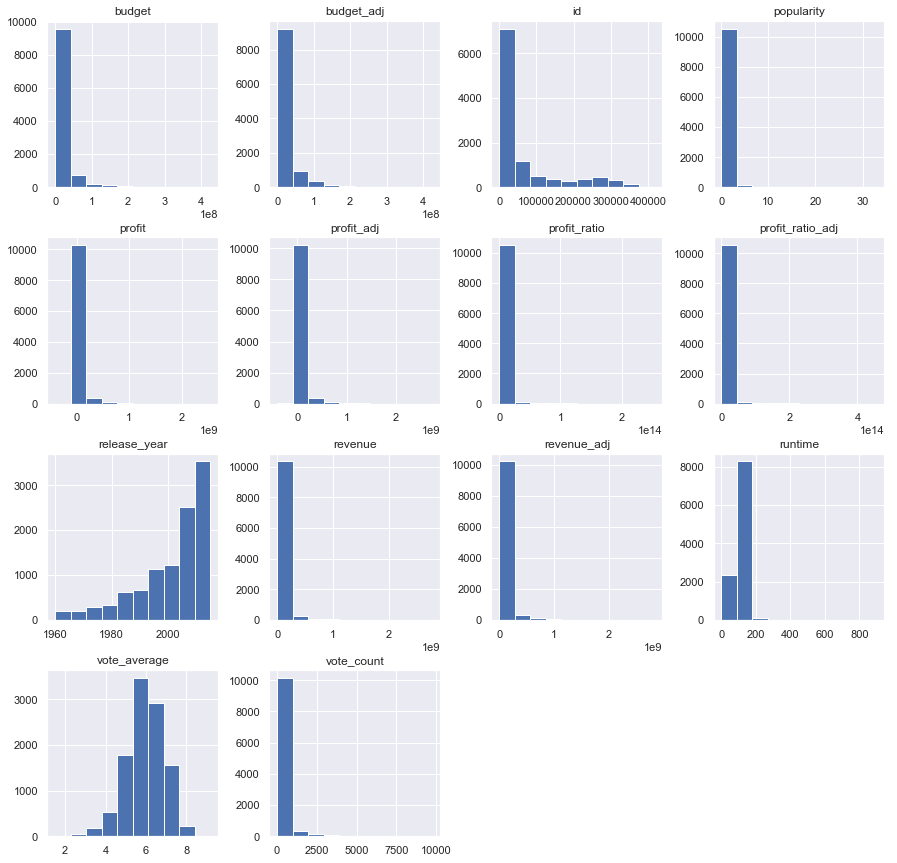

In [38]:
df.hist(figsize=(15,15));

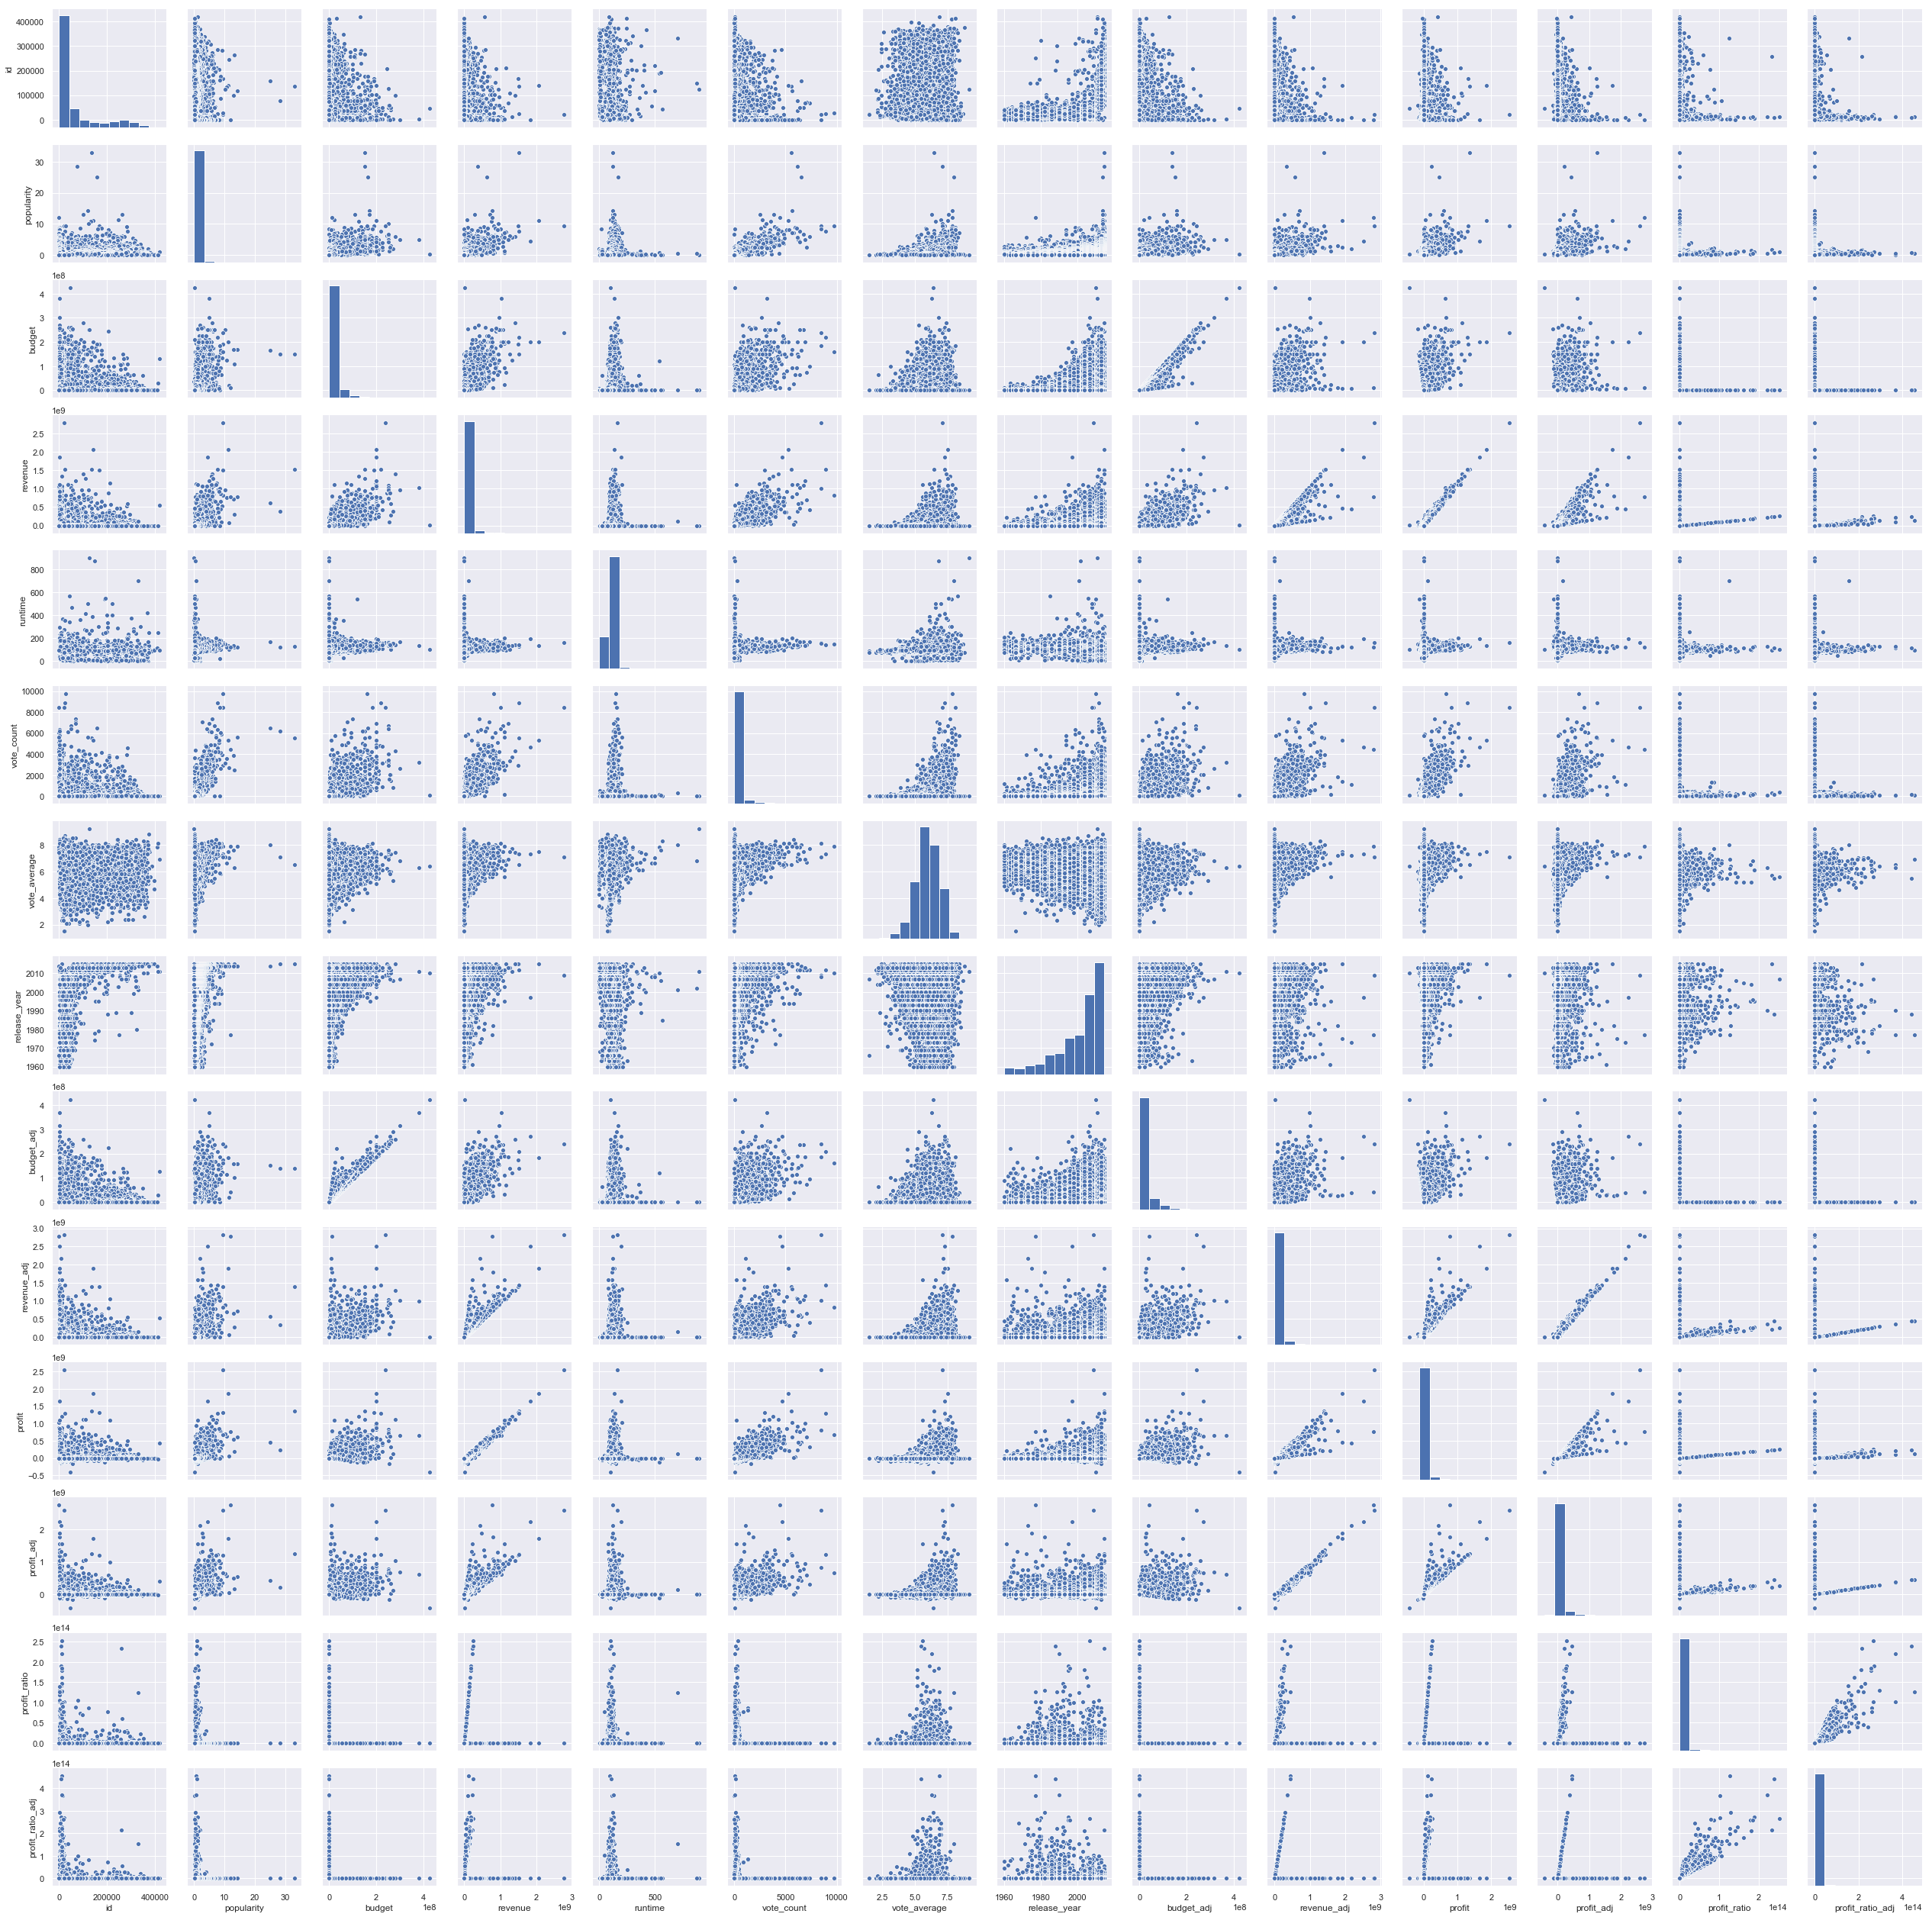

In [39]:
# Scatter plot of df using seaborn
sns_scatterplt = sns.pairplot(df, height = 2.5)

From scatter plots:<br>
<li><b>Revenue and Profits are positively correlated

<a id='Q0'></a>
### Research Question 0: Fun Facts

>This section I will investigate various fun facts

<li><b>1. Words with highest frequency appeared in the movie titles:

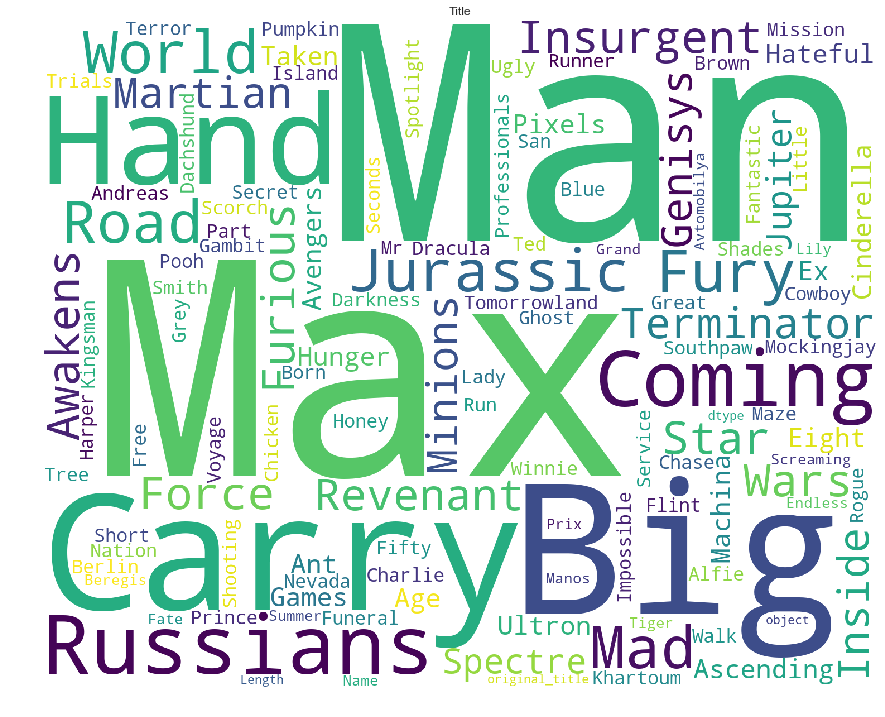

In [40]:
# Wordcloud for title visualization:

from wordcloud import WordCloud, STOPWORDS
text = (str(df['original_title']))
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1500, height=1200).generate(text)
plt.imshow(wordcloud)
plt.title('Title')
plt.axis('off');

><li>Title analysis just for fun. ^^

<li><b>2. Top 10 Most Popular Movies:

In [41]:
# Top 10 Most Popular Movies:

df[['popularity', 'original_title']].sort_values(by='popularity', ascending=False).head(10)

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent
631,12.971027,Captain America: The Winter Soldier
1329,12.037933,Star Wars
632,11.422751,John Wick
3,11.173104,Star Wars: The Force Awakens
633,10.739009,The Hunger Games: Mockingjay - Part 1


<li><b>3. Top 10 Highest Rating Movies:

In [42]:
# Top 10 Highest Rating Movies:
df[['vote_average', 'original_title']].sort_values(by='vote_average', ascending=False).head(10)

,vote_average,original_title
3894,9.2,The Story of Film: An Odyssey
1200,8.8,Black Mirror: White Christmas
6911,8.7,Pink Floyd: Pulse
3690,8.5,The Art of Flight
8221,8.5,A Personal Journey with Martin Scorsese Throug...
8839,8.5,Dave Chappelle: Killin' Them Softly
8411,8.5,Queen - Rock Montreal
4178,8.4,The Shawshank Redemption
2334,8.4,Rush: Beyond the Lighted Stage
609,8.4,The Jinx: The Life and Deaths of Robert Durst


<li><b> 4.Top 10 Most Profitable Movies (sorted by adjusted profit and profit):

In [43]:
df[['profit_adj', 'original_title']].sort_values(by='profit_adj', ascending=False).head(10)

,profit_adj,original_title
1329,2.750137e+09,Star Wars
1386,2.586237e+09,Avatar
5231,2.234714e+09,Titanic
10594,2.128036e+09,The Exorcist
9806,1.878643e+09,Jaws
8889,1.767968e+09,E.T. the Extra-Terrestrial
3,1.718723e+09,Star Wars: The Force Awakens
8094,1.551568e+09,The Net
10110,1.545635e+09,One Hundred and One Dalmatians
7309,1.376998e+09,The Empire Strikes Back


In [44]:
df[['profit', 'original_title']].sort_values(by='profit', ascending=False).head(10)

,profit,original_title
1386,2544505847,Avatar
3,1868178225,Star Wars: The Force Awakens
5231,1645034188,Titanic
0,1363528810,Jurassic World
4,1316249360,Furious 7
4361,1299557910,The Avengers
3374,1202817822,Harry Potter and the Deathly Hallows: Part 2
14,1125035767,Avengers: Age of Ultron
5422,1124219009,Frozen
8094,1084279658,The Net


><b>Profitability should be evaluated by profit rather than ratios. Some movies have "0" budget so we add 0.000001 in previous steps, and this will make profit_ratio super high.

<li><b>5. Top 10 Actors Starred In Most Movies:

In [45]:
df_split_cast['cast_split'].value_counts().head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Liam Neeson          48
Name: cast_split, dtype: int64

<li><b>6. Top 10 Keywords In Most Movies:

In [46]:
df_split_keywords['keywords_split'].value_counts().head(10)

woman director      408
independent film    393
based on novel      278
sex                 272
sport               215
murder              204
musical             169
biography           168
new york            162
suspense            159
Name: keywords_split, dtype: int64

<li><b>7. Top 10 Production Companies:

In [47]:
df_split_production['production_split'].value_counts().head(10)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: production_split, dtype: int64

<a id='Q1'></a>
### Research Question 1:  Genre Trends from 1960 to 2015

>This section I will investigate different genres

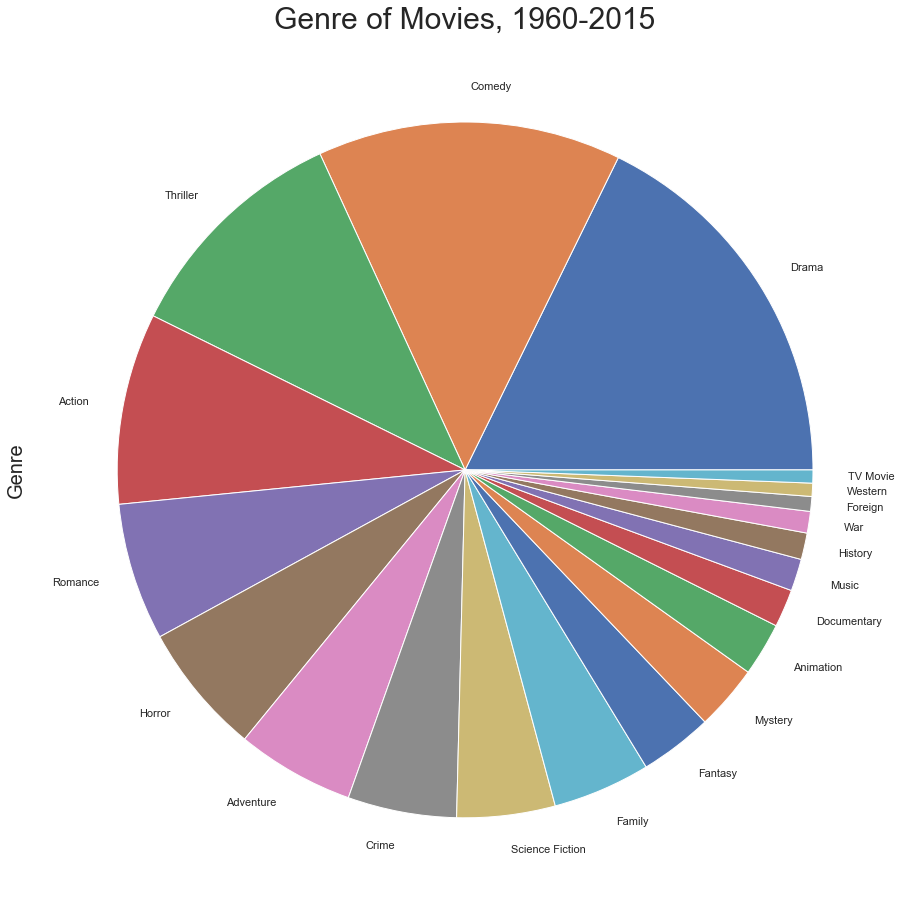

In [48]:
# Plot pie chart to visualize genre distribution
df_split_genre['genre_split'].value_counts().plot(kind = 'pie',figsize = (16,16));
plt.title('Genre of Movies, 1960-2015', size=30)
plt.ylabel('Genre', size=20);

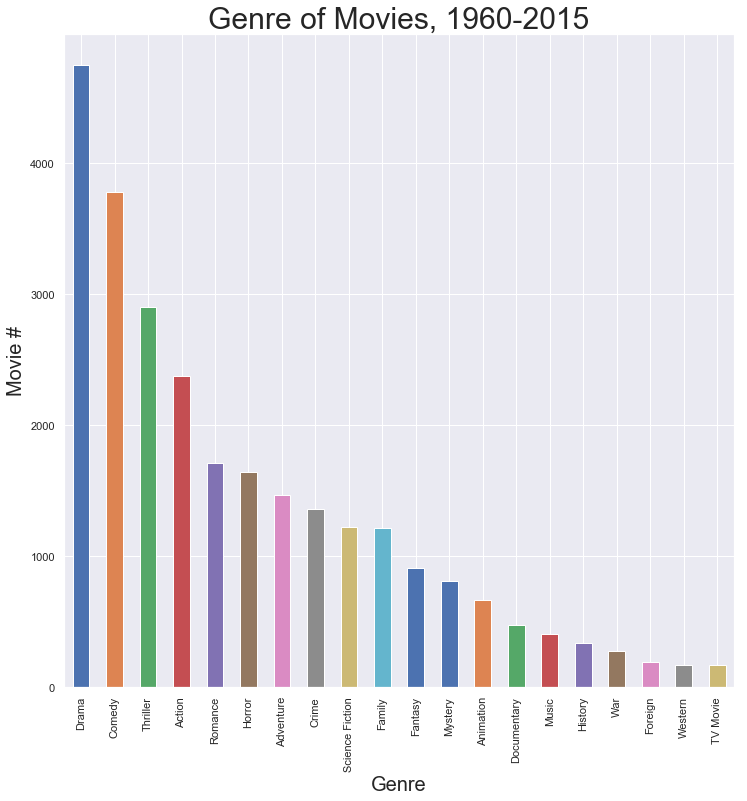

In [49]:
#Plot bar chart to visualize genre distribution
df_split_genre['genre_split'].value_counts().plot(kind='bar',figsize = (12,12));
plt.title('Genre of Movies, 1960-2015', size=30)
plt.xlabel('Genre', size=20)
plt.ylabel('Movie #', size=20);

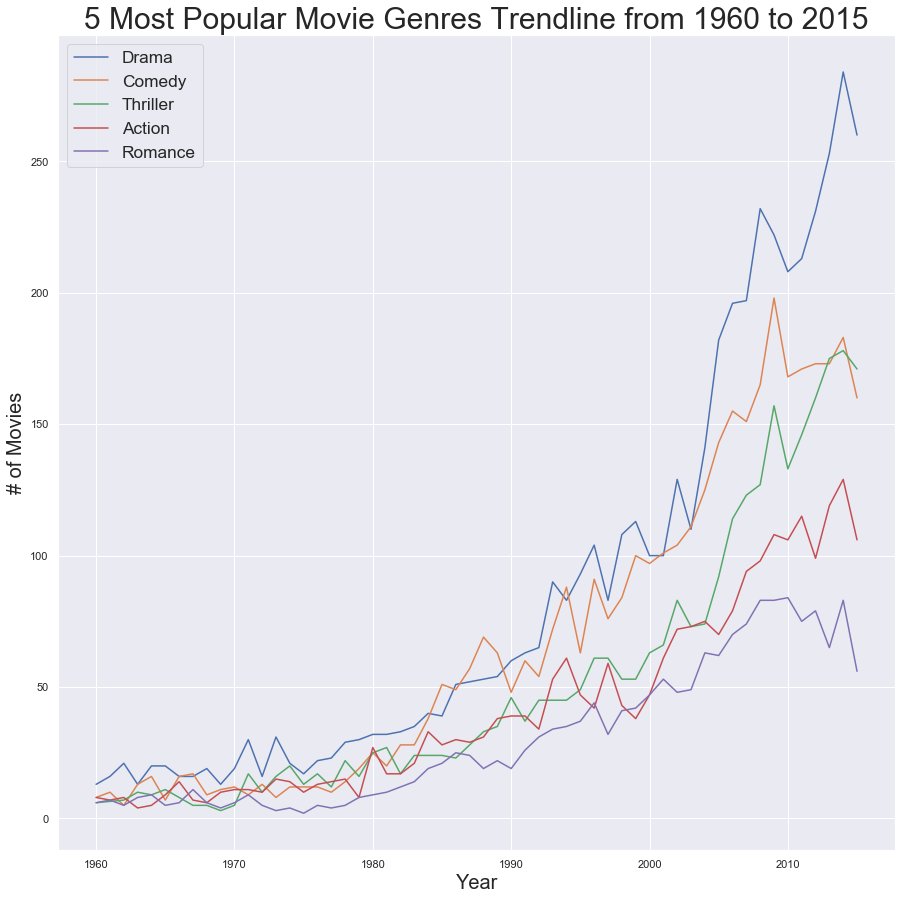

In [50]:
# Select data from df for 5 most popular genres: Drama, Comedy, Thriller, Action, Romance.
# Then plot the total counts of different genres for each year from 1960 to 2015
drama = df_split_genre.genre_split == 'Drama'
df_drama = df_split_genre[drama]
df_drama.groupby('release_year')['genre_split'].count().plot(figsize=(15,15),label='Drama')


comedy = df_split_genre.genre_split == 'Comedy'
df_comedy = df_split_genre[comedy]
df_comedy.groupby('release_year')['genre_split'].count().plot(label='Comedy')

thriller = df_split_genre.genre_split == 'Thriller'
df_thriller = df_split_genre[thriller]
df_thriller.groupby('release_year')['genre_split'].count().plot(label='Thriller')


action = df_split_genre.genre_split == 'Action'
df_action = df_split_genre[action]
df_action.groupby('release_year')['genre_split'].count().plot(label='Action')


romance = df_split_genre.genre_split == 'Romance'
df_romance = df_split_genre[romance]
df_romance.groupby('release_year')['genre_split'].count().plot(label='Romance')

plt.title('5 Most Popular Movie Genres Trendline from 1960 to 2015',size=30)
plt.xlabel('Year',size=20)
plt.ylabel('# of Movies',size=20)
plt.legend(fontsize = 'xx-large');

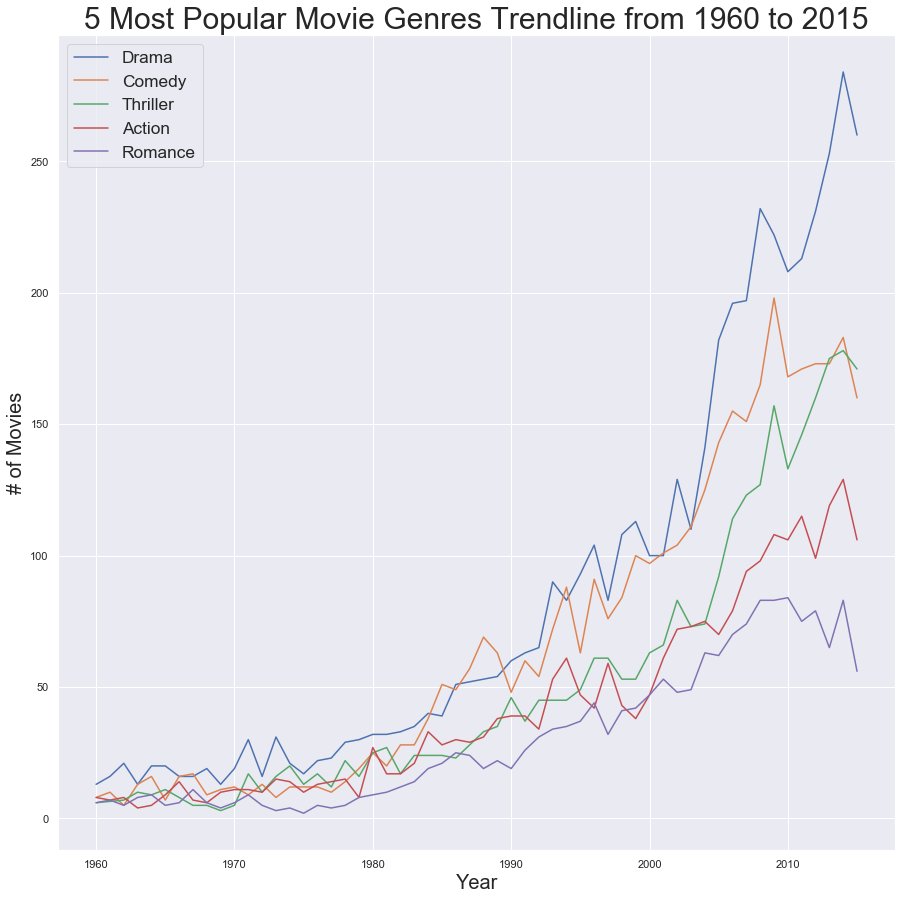

In [51]:
# Select data from df for 5 most popular genres: Drama, Comedy, Thriller, Action, Romance.
# Then plot the total counts of different genres for each year from 1960 to 2015

top_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']

######### Code below is hard to read but more concise, I don't know which one is better according to rubric ########
for i in range(len(top_genres)):
    df_split_genre[df_split_genre.genre_split == top_genres[i]].groupby('release_year')['genre_split'].count().plot(figsize=(15,15),label=top_genres[i])

plt.title('5 Most Popular Movie Genres Trendline from 1960 to 2015',size=30)
plt.xlabel('Year',size=20)
plt.ylabel('# of Movies',size=20)
plt.legend(fontsize = 'xx-large');

From the line chart above:<br>
    <b><li> All types of movies are increasing from 1960 to 2015
    <b><li> The largest growth rate occurred during 2000-2010 
    <b><li> Drama is the most popular genre through the years except being exceeded by Comedy during the late 80's
    <b><li> Romance is the least popular genre among top 5 genres. The growth rate of romance movies is the slowest.

<a id='Q2'></a>
### Research Question 2: Properties Associated With Higher Profits

>This section I will investigate which movie factors are related to higher profits

<b><li>1. Profit vs. Genre:

In [52]:
# Find all genres:

df_split_genre.genre_split.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [53]:
# Get total number of genres for later avg_profit calculation:

num_g = df_split_genre.genre_split.value_counts()
genres_total_num = list(num_g)
genres_total_num

[4746,
 3775,
 2902,
 2376,
 1708,
 1636,
 1465,
 1353,
 1221,
 1214,
 908,
 808,
 664,
 470,
 399,
 330,
 268,
 184,
 164,
 162]

In [54]:
# Calculate sums of profit of each genres:

genres_labels = ['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign']

profit_by_genres = []

for i in range(len(genres_labels)):
    profit_by_genres.append(df_split_genre[df_split_genre.genre_split == genres_labels[i]].profit.sum())

profit_by_genres

[107439517424,
 111199018978,
 55511321460,
 71284730705,
 58355181708,
 33450381145,
 1583109216,
 82594648101,
 60420445751,
 36417750351,
 91896372240,
 19519620245,
 39644299221,
 7212590243,
 4488235887,
 7813519034,
 17346109400,
 745802029,
 -2700000,
 9406683]

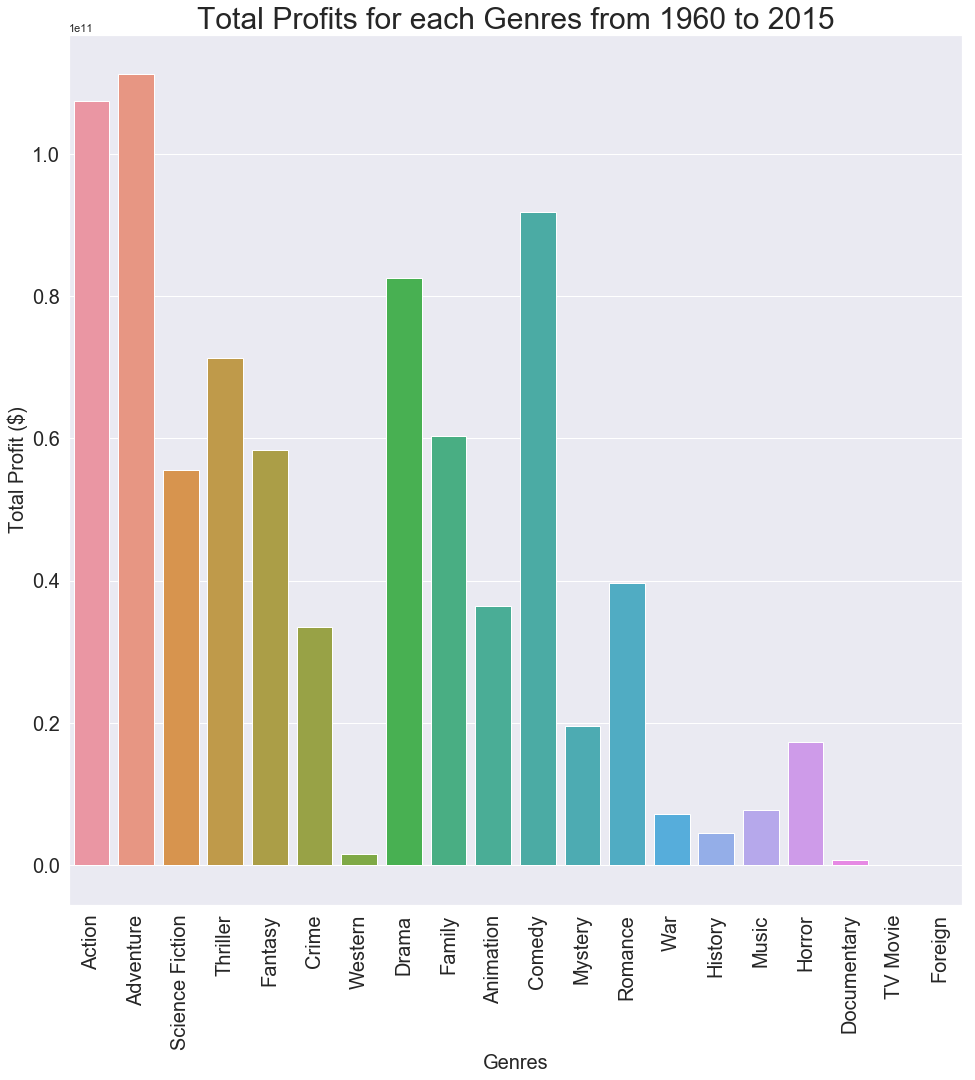

In [55]:
# Visualization for total profits of each genres:

plt.figure(figsize=(16, 16))
sns.barplot(x=genres_labels, y=profit_by_genres)
plt.title('Total Profits for each Genres from 1960 to 2015',size=30)
plt.xlabel('Genres',size=20)
plt.ylabel('Total Profit ($)',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20);

In [56]:
# Calculate average profits for each genres:

avg_profit = np.divide(profit_by_genres,genres_total_num)
avg_profit = avg_profit.astype(int)
avg_profit

array([ 22637909,  29456693,  19128642,  30001991,  34165797,  20446443,
         1080620,  61045564,  49484394,  29998146, 101207458,  24157945,
        59705269,  15345936,  11248711,  23677330,  64724288,   4053271,
          -16463,     58065])

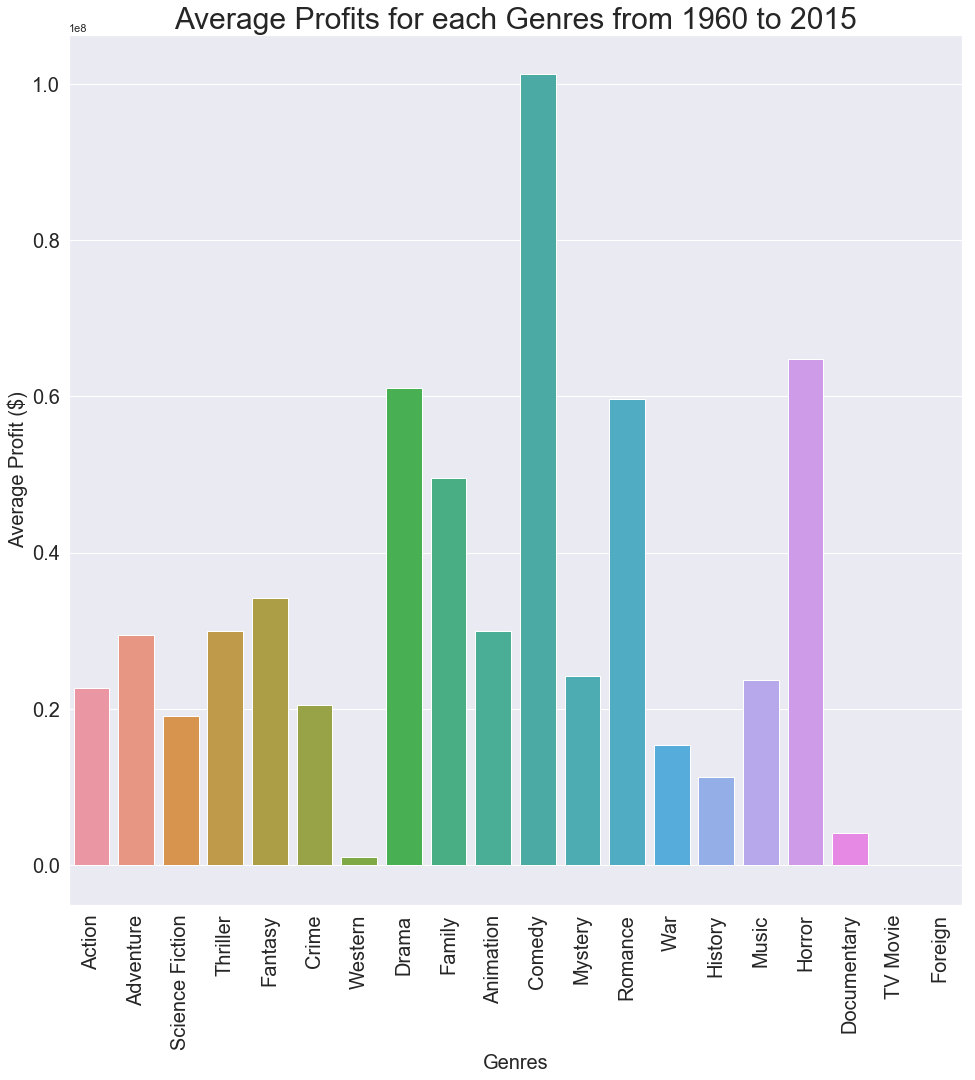

In [57]:
# Visualization for average profits of each genres:

plt.figure(figsize=(16, 16))
sns.barplot(x=genres_labels, y=avg_profit)
plt.title('Average Profits for each Genres from 1960 to 2015',size=30)
plt.xlabel('Genres',size=20)
plt.ylabel('Average Profit ($)',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20);

From bar chart above:<br>
<li>Top 5 most profitable genres are: <b>1.Comedy</b>, <b>2.Horror</b>, <b>3.Drama</b>, <b>4.Romance</b>, <b>5.Family</b>.

<b><li>2. Profit vs. Popularity:

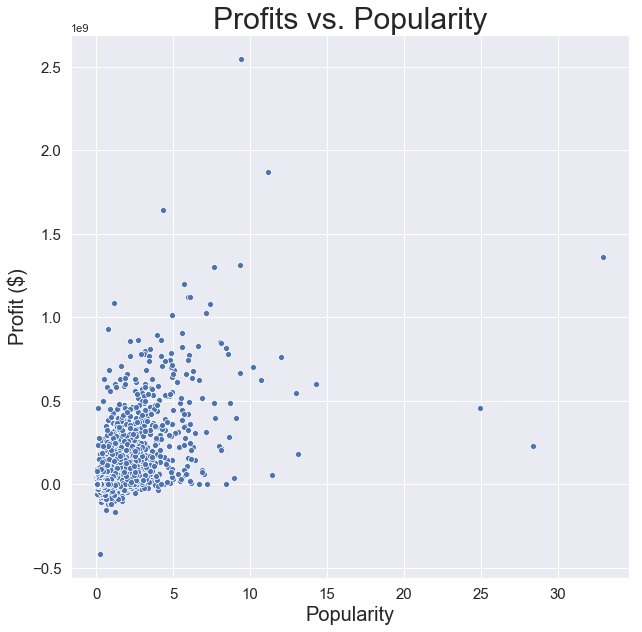

In [58]:
# Plot Profit vs. Popularity:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['popularity'],y=df['profit'])
plt.title('Profits vs. Popularity',size=30)
plt.xlabel('Popularity',size=20)
plt.ylabel('Profit ($)',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

<b><li>3. Profit vs. Runtime:

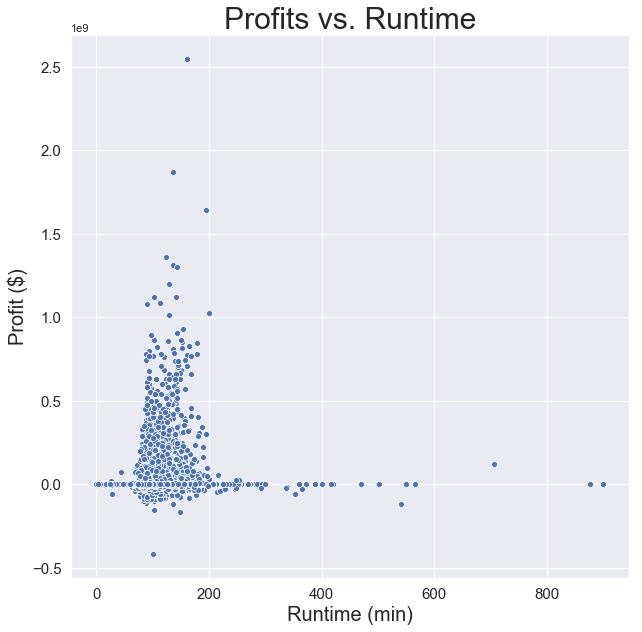

In [59]:
# Plot Profit vs. Runtime:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['runtime'],y=df['profit'])
plt.title('Profits vs. Runtime',size=30)
plt.xlabel('Runtime (min)',size=20)
plt.ylabel('Profit ($)',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

<b><li>4. Profit vs. Revenue:

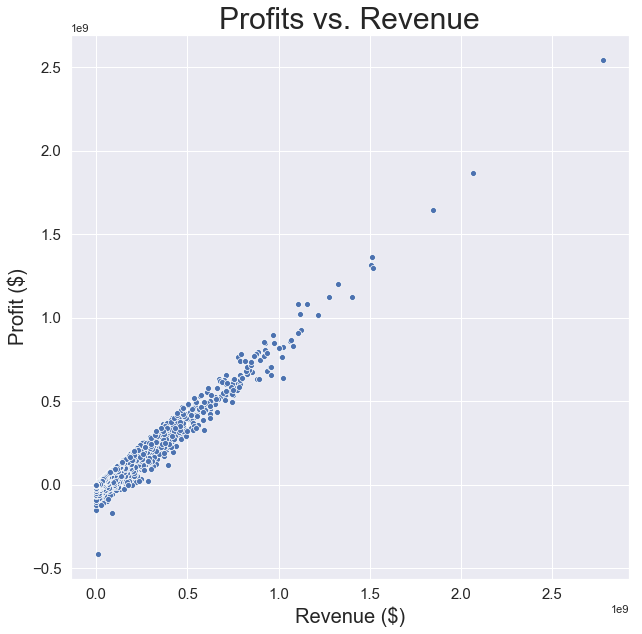

In [60]:
# Plot Profit vs. Revenue:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['revenue'],y=df['profit'])
plt.title('Profits vs. Revenue',size=30)
plt.xlabel('Revenue ($)',size=20)
plt.ylabel('Profit ($)',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

<b><li>5. Profit vs. Budget:

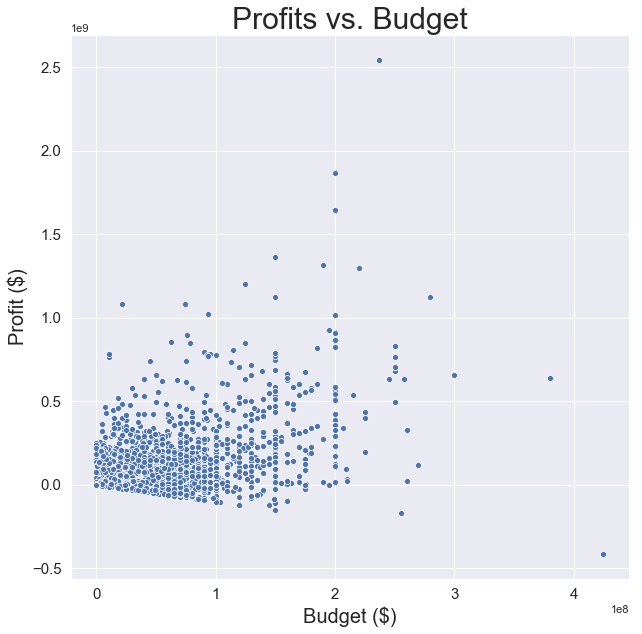

In [61]:
# Plot Profit vs. Budget:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['budget'],y=df['profit'])
plt.title('Profits vs. Budget',size=30)
plt.xlabel('Budget ($)',size=20)
plt.ylabel('Profit ($)',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

<b><li>6. Profit vs. Vote_Count:

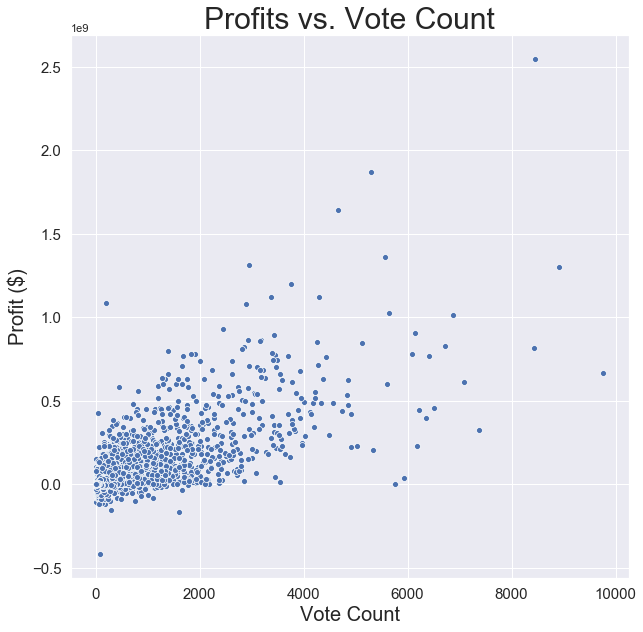

In [62]:
# Plot Profit vs. Vote_Count:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['vote_count'],y=df['profit'])
plt.title('Profits vs. Vote Count',size=30)
plt.xlabel('Vote Count',size=20)
plt.ylabel('Profit ($)',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

<a id='conclusions'></a>
## Conclusions

## Summary of Data
### Question 0: Fun Facts
-  __Top 5 most common words in movie titles:__ _Max, Man, Big, Carry, Hand._
-  __Top 10 Most Popular Movies:__ _Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent, Captain America: The Winter Soldier, Star Wars, John Wick, Star Wars: The Force Awakens, The Hunger Games: Mockingjay - Part 1._
-  __Top 10 Highest Rating Movies:__ _The Story of Film: An Odyssey, Black Mirror: White Christmas, Pink Floyd: Pulse, The Art of Flight, A Personal Journey With Martin Scorsese Through American Movies, Dave Chappelle: Killin' Them Softly, Queen - Rock Montreal, The Shawshank Redemption, Rush: Beyond the Lighted Stage, The Jinx: The Life and Deaths of Robert Durst._
-  __Top 10 Most Profitable Movies:__ _Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part 2, Avengers: Age of Ultron, Frozen, The Net._
-  __Top 10 Most Profitable Movies (sorted by adjusted profit):__ _Star Wars, Avatar, Titanic, The Exorcist, Jaws, E.T. the Extra-Terrestrial, Star Wars: The Force Awakens, The Net, One Hundred and One Dalmatians, The Empire Strikes Back._
-  __Top 10 Actors Starred Most Movies:__ _Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, Michael Caine, Robin Williams, John Cusack, Morgan Freeman, John Goodman, Susan Sarandon._
-  __Top 10 Keywords:__ _woman director, independent film, based on novel, sex, sport, murder, musical, biography, new york, suspense._
-  __Top 10 Production Companies:__ _Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures, New Line Cinema, Metro-Goldwyn-Mayer (MGM), Walt Disney Pictures, Touchstone Pictures, Columbia Pictures Corporation._
> __NOTE：__ I'm not sure if _Columbia Pictures_ and _Columbia Pictures Corporation_ are the same company. If so, I should replace one name to the other to merge those two. 

#### Question 1: Genre Trends from 1960 to 2015
-  __Drama, Comedy, Thriller, Action and Romance__ are the most popular genres and make up over 50% of all movies made from 1960-2015. __TV Movie, Western, and Foreign__ are the least popular.
-  All types of movies are __increasing__ from 1960 to 2015.
-  The largest growth rate occurred during __2000-2010__.
-  __Drama__ is the most popular genre through the years except being exceeded by Comedy during the late 80’s.
-  __Romance__ is the least popular genre among top 5 genres. The growth rate of romance movies is the slowest.

#### Question 2: Properties Associated with Higher Profits
-  __Top 5 Genres with Highest Total Profits:__ _Adventure, Action, Comedy, Drama, Thriller._
-  __Top 5 Genres with Highest Average Profits:__ _Comedy, Horror, Drama, Romance, Family._
-  __Profit vs. Popularity:__ Correlation is __0.628699__, moderate positive correlation. Higher popularity can somewhat lead to higher profit for a movie.
-  __Profit vs. Runtime:__ Correlation is __0.137497__, weak positive correlation. Runtime is not related to profit for a movie.
-  __Profit vs. Revenue:__ Correlation is __0.976173__, strong positive correlation which is obvious. 
-  __Profit vs. Budget:__ Correlation is __0.569730__, moderate positive correlation. Higher budget cannot guarantee higher profit for a movie.
-  __Profit vs. Vote Count:__ Correlation is __0.755681__, medium-strong positive correlation. Since correlation between vote count and popularity is __0.800619__ and has strong positive correlation, more vote counts indicate the movie will have higher profit.

## Notes & Limitations

__Raw Data:__

Original data was collected only from _The Movie Database (TMDB)_, so sample bias may exist for data such as 'popularity', 'vote_count' and 'vote_average'. For more accurate results, data from other movie database (eg. IMDb) should be joined into our dataframe.


__Data Cleaning:__ 

Columns dropped and reasons:
><b>'imdb_id'</b> : Already have 'id'
<br> <b>'homepage'</b> : Not relevant
<br> <b>'tagline'</b> : Already have keywords
<br> <b>'overview'</b> : Already have keywords
<br> <b>'release_year'</b> : Already have 'release_date'
    
Added __profit = (revenue - budget)__ and __profit_ratio = (profit/budget)__ columns to investigate profitability.

Split columns 'cast', 'director', 'keywords', 'genres', 'production_companies' that contain multiple values separated by pipe __(|)__.

For the purpose of preserving more data, I did not remove rows with null values in 'keywords' and/or 'production_companies' columns. After Data Cleaning, I have 5 clean dataframes:
><li> <b>df</b>
<br><li><b>df_keywords</b>
<br><li><b>df_production</b>
<br><li><b>df_cast</b>
<br><li><b>df_director</b>

All of them have null value in either 'keywords' or 'production_companies' or both columns, but this will not affect our analysis because each dataframe will only be using to answer specific questions that not related to the column(s) with null values.